In [20]:
import numpy as np
import pandas as pd

In [21]:
data = pd.read_csv('Base_de_datos.csv')

In [22]:
data.head()

,2theta,Imax,2theta.1,Imax.1,2theta.2,Imax.2,2theta.3,Imax.3,2theta.4,Imax.4,2theta.5,Imax.5,l_onda,Abs,l_onda.1,Abs.1,Oxigenos,plasmon_MG,FormQuimica,ID
0,37.333911,75.538921,37.430121,37.769461,43.379574,100.000000,43.492849,50.000000,63.022592,57.538567,63.197238,28.769284,779.863039,108752.482799,255.446675,73514.984751,1,779.863039,NiO,1010093
1,36.427250,100.000000,36.520955,50.000000,42.312694,36.667373,42.422908,18.333687,61.382243,29.275007,73.526287,23.737866,277.282698,153165.951540,NaN,NaN,1,277.282698,Cu2O,9007497
2,30.935761,28.858482,36.447814,100.000000,36.541576,50.000000,58.675346,28.829488,64.470429,43.404479,64.650072,21.702240,573.579173,69136.178521,213.993187,81182.901927,4,213.993187,Co3O4,9005900
3,6.424188,100.000000,6.440168,50.000000,12.868678,17.966022,12.900790,8.983011,20.347600,8.466455,21.358295,6.941689,680.743674,26842.279315,362.315720,31640.886196,3,362.315720,Fe2O3,2101169
4,22.148916,97.226675,22.204650,48.613337,22.405949,66.140390,23.606936,100.000000,23.666442,50.000000,25.479106,47.180408,592.566008,66211.495776,257.614114,89383.590950,11,257.614114,Mo4O11,1527635


In [23]:
##### Let's calculate material specific properties for some materials using pymatgen #####

from pymatgen.core import Element, Composition, Lattice, Structure, Molecule
from pymatgen.symmetry.analyzer import SpacegroupAnalyzer

si = Element('Si')
print(f'Atomic mass of Silicon (Si) is {si.atomic_mass}')

comp = Composition('Fe2O3')
print(f'weight of components in Fe2O3 is {comp.weight}')
print(f'{comp['Fe']}')
print(f'atomic fraction of Fe is {comp.get_atomic_fraction('Fe')}')



Atomic mass of Silicon (Si) is 28.0855 amu
weight of components in Fe2O3 is 159.6882 amu
2.0
atomic fraction of Fe is 0.4


In [24]:
all_features = data.drop(['FormQuimica','ID'], axis=1)

In [25]:
all_features.head(10)

,2theta,Imax,2theta.1,Imax.1,2theta.2,Imax.2,2theta.3,Imax.3,2theta.4,Imax.4,2theta.5,Imax.5,l_onda,Abs,l_onda.1,Abs.1,Oxigenos,plasmon_MG
0,37.333911,75.538921,37.430121,37.769461,43.379574,100.000000,43.492849,50.000000,63.022592,57.538567,63.197238,28.769284,779.863039,1.087525e+05,255.446675,73514.984751,1,779.863039
1,36.427250,100.000000,36.520955,50.000000,42.312694,36.667373,42.422908,18.333687,61.382243,29.275007,73.526287,23.737866,277.282698,1.531660e+05,NaN,NaN,1,277.282698
2,30.935761,28.858482,36.447814,100.000000,36.541576,50.000000,58.675346,28.829488,64.470429,43.404479,64.650072,21.702240,573.579173,6.913618e+04,213.993187,81182.901927,4,213.993187
3,6.424188,100.000000,6.440168,50.000000,12.868678,17.966022,12.900790,8.983011,20.347600,8.466455,21.358295,6.941689,680.743674,2.684228e+04,362.315720,31640.886196,3,362.315720
4,22.148916,97.226675,22.204650,48.613337,22.405949,66.140390,23.606936,100.000000,23.666442,50.000000,25.479106,47.180408,592.566008,6.621150e+04,257.614114,89383.590950,11,257.614114
5,33.116897,100.000000,33.201565,50.000000,35.611205,72.521325,35.702667,36.260662,49.417330,37.608216,54.002397,45.569686,680.056637,9.526638e+04,231.492841,121875.766996,3,231.492841
6,21.992749,46.880101,26.423461,94.103738,26.490312,47.051869,29.024368,60.908701,30.709373,100.000000,30.787568,50.000000,897.590572,3.974183e+04,228.211256,139345.155223,9,228.211256
7,20.460184,100.000000,20.511573,50.000000,26.293101,38.058183,33.978516,39.817684,36.104962,38.229090,40.684326,26.976759,891.567185,4.774046e+04,NaN,NaN,2,891.567185
8,33.171289,100.000000,33.256105,50.000000,35.669745,66.120592,35.761367,33.060296,54.095589,50.085890,64.076248,29.119782,650.964788,1.112833e+05,NaN,NaN,3,650.964788
9,15.022825,100.000000,15.060370,50.000000,28.992517,58.345148,30.311920,84.717813,38.413840,50.108052,50.547262,45.034864,890.655159,1.518731e+07,NaN,NaN,7,890.655159


In [26]:
# Let's fill the missing values with the mean of the column
all_features.fillna(all_features.mean(), inplace=True)

In [27]:
all_features.head(10)

,2theta,Imax,2theta.1,Imax.1,2theta.2,Imax.2,2theta.3,Imax.3,2theta.4,Imax.4,2theta.5,Imax.5,l_onda,Abs,l_onda.1,Abs.1,Oxigenos,plasmon_MG
0,37.333911,75.538921,37.430121,37.769461,43.379574,100.000000,43.492849,50.000000,63.022592,57.538567,63.197238,28.769284,779.863039,1.087525e+05,255.446675,73514.984751,1,779.863039
1,36.427250,100.000000,36.520955,50.000000,42.312694,36.667373,42.422908,18.333687,61.382243,29.275007,73.526287,23.737866,277.282698,1.531660e+05,263.381853,118066.822359,1,277.282698
2,30.935761,28.858482,36.447814,100.000000,36.541576,50.000000,58.675346,28.829488,64.470429,43.404479,64.650072,21.702240,573.579173,6.913618e+04,213.993187,81182.901927,4,213.993187
3,6.424188,100.000000,6.440168,50.000000,12.868678,17.966022,12.900790,8.983011,20.347600,8.466455,21.358295,6.941689,680.743674,2.684228e+04,362.315720,31640.886196,3,362.315720
4,22.148916,97.226675,22.204650,48.613337,22.405949,66.140390,23.606936,100.000000,23.666442,50.000000,25.479106,47.180408,592.566008,6.621150e+04,257.614114,89383.590950,11,257.614114
5,33.116897,100.000000,33.201565,50.000000,35.611205,72.521325,35.702667,36.260662,49.417330,37.608216,54.002397,45.569686,680.056637,9.526638e+04,231.492841,121875.766996,3,231.492841
6,21.992749,46.880101,26.423461,94.103738,26.490312,47.051869,29.024368,60.908701,30.709373,100.000000,30.787568,50.000000,897.590572,3.974183e+04,228.211256,139345.155223,9,228.211256
7,20.460184,100.000000,20.511573,50.000000,26.293101,38.058183,33.978516,39.817684,36.104962,38.229090,40.684326,26.976759,891.567185,4.774046e+04,263.381853,118066.822359,2,891.567185
8,33.171289,100.000000,33.256105,50.000000,35.669745,66.120592,35.761367,33.060296,54.095589,50.085890,64.076248,29.119782,650.964788,1.112833e+05,263.381853,118066.822359,3,650.964788
9,15.022825,100.000000,15.060370,50.000000,28.992517,58.345148,30.311920,84.717813,38.413840,50.108052,50.547262,45.034864,890.655159,1.518731e+07,263.381853,118066.822359,7,890.655159


In [28]:
# Let's standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
all_features_scaled = scaler.fit_transform(all_features)

In [29]:
all_features_scaled = pd.DataFrame(all_features_scaled, columns=all_features.columns)
all_features_scaled.head(10)

,2theta,Imax,2theta.1,Imax.1,2theta.2,Imax.2,2theta.3,Imax.3,2theta.4,Imax.4,2theta.5,Imax.5,l_onda,Abs,l_onda.1,Abs.1,Oxigenos,plasmon_MG
0,1.489079,0.175017,1.165418,-1.061289,1.596935,1.503165,0.548258,-0.016815,1.274264,0.572288,0.839185,-0.461948,0.663456,-0.044450,-0.149097,-1.829584e-01,-0.485764,1.317705
1,1.352032,1.008403,1.023359,-0.587854,1.426606,-1.001836,0.440762,-1.242992,1.149456,-0.936250,1.630962,-0.760552,-1.368445,-0.044420,0.000000,1.195190e-16,-0.485764,-0.676281
2,0.521965,-1.415378,1.011931,1.347607,0.505238,-0.474490,2.073635,-0.836576,1.384424,-0.182104,0.950552,-0.881362,-0.170537,-0.044478,-0.927979,-1.514690e-01,-0.031075,-0.927382
3,-3.183086,1.008403,-3.676829,-0.587854,-3.274174,-1.741532,-2.525308,-1.605067,-1.972720,-2.046886,-2.367999,-1.757369,0.262722,-0.044507,1.858900,-3.549203e-01,-0.182638,-0.338913
4,-0.806212,0.913916,-1.213594,-0.641531,-1.751535,0.163913,-1.449668,1.919277,-1.720202,0.169925,-2.052116,0.630713,-0.093775,-0.044480,-0.108372,-1.177917e-01,1.029867,-0.754316
5,0.851655,1.008403,0.504697,-0.587854,0.356703,0.416298,-0.234417,-0.548827,0.239089,-0.491474,0.134350,0.535120,0.259945,-0.044460,-0.599173,1.564197e-02,-0.182638,-0.857952
6,-0.829817,-0.801384,-0.554396,1.119367,-1.099461,-0.591097,-0.905382,0.405590,-1.184331,2.838624,-1.645193,0.798049,1.139421,-0.044498,-0.660832,8.738247e-02,0.726741,-0.870972
7,-1.061473,1.008403,-1.478141,-0.587854,-1.130946,-0.946825,-0.407641,-0.411092,-0.773800,-0.458335,-0.886553,-0.568331,1.115069,-0.044492,0.000000,1.195190e-16,-0.334201,1.760891
8,0.859877,1.008403,0.513219,-0.587854,0.366049,0.163130,-0.228519,-0.672751,0.595041,0.174509,0.906565,-0.441147,0.142328,-0.044449,0.000000,1.195190e-16,-0.182638,0.806301
9,-1.883358,1.008403,-2.329903,-0.587854,-0.699980,-0.144413,-0.776022,1.327523,-0.598126,0.175692,-0.130505,0.503379,1.111381,-0.034055,0.000000,1.195190e-16,0.423615,1.757272


In [30]:
# Let's use PCA for feature selection
from sklearn.decomposition import PCA

pca = PCA(n_components=3)

principalComponents = pca.fit_transform(all_features_scaled)

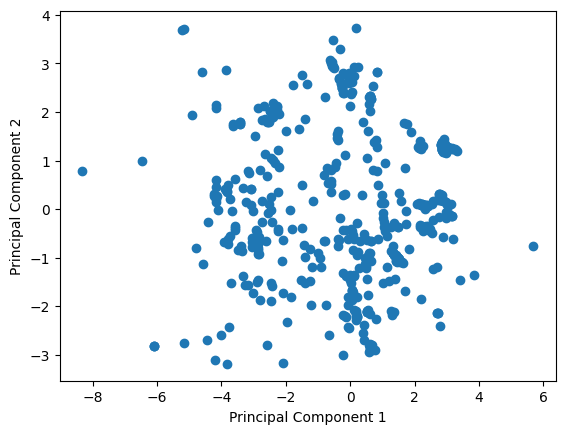

In [31]:
# Let's visualize the principal components
import matplotlib.pyplot as plt
plt.scatter(principalComponents[:,0], principalComponents[:,1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [32]:
# Let's understand the contribution of each principal component to the variance

loadings = pca.components_
sq_components = loadings**2
contributions = sq_components/np.sum(sq_components, axis=1).reshape(-1,1)
percentages = np.round(contributions*100,2)
percentages

array([[1.308e+01, 1.500e+00, 1.385e+01, 5.000e-02, 1.529e+01, 1.500e-01,
        1.374e+01, 1.710e+00, 1.614e+01, 5.100e-01, 1.493e+01, 1.870e+00,
        1.500e-01, 8.000e-02, 7.000e-02, 2.500e-01, 4.320e+00, 2.300e+00],
       [0.000e+00, 1.545e+01, 4.710e+00, 1.874e+01, 1.200e-01, 9.000e-02,
        2.800e-01, 1.585e+01, 8.900e-01, 4.080e+00, 1.500e-01, 1.155e+01,
        1.322e+01, 8.000e-02, 2.600e-01, 7.000e-02, 3.900e+00, 1.054e+01],
       [5.800e+00, 6.200e+00, 1.600e+00, 1.299e+01, 2.620e+00, 2.592e+01,
        4.090e+00, 6.580e+00, 1.000e-01, 1.797e+01, 2.000e-02, 9.270e+00,
        1.200e-01, 2.800e-01, 2.150e+00, 3.000e-01, 3.180e+00, 8.000e-01]])

In [33]:
X = principalComponents
y = data['FormQuimica']

In [34]:
len(y.unique())

113

In [35]:
# Let's convert the target variable to numerical
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

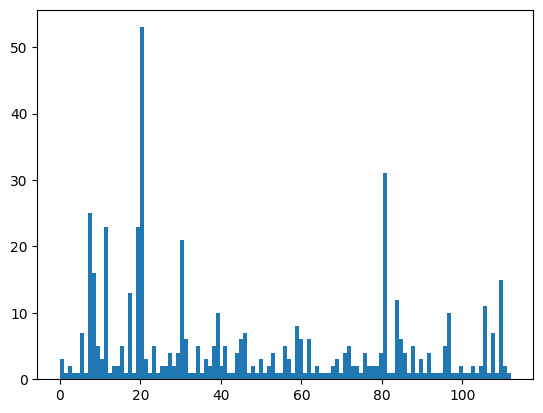

In [36]:
import matplotlib.pyplot as plt
plt.hist(y, bins=113)
plt.show()

In [37]:
# Let's split the given data into training set , test set and validation set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [38]:
# Let's train a KNeighboursClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

neighbours = range(1,20)
accuracy = []
for n_neighbours in neighbours:
    knn = KNeighborsClassifier(n_neighbors=n_neighbours)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_val)
    accuracy.append(accuracy_score(y_val, y_pred))

# Let's find the optimal number of neighbours
n_optimal = neighbours[accuracy.index(max(accuracy))]
n_optimal

1

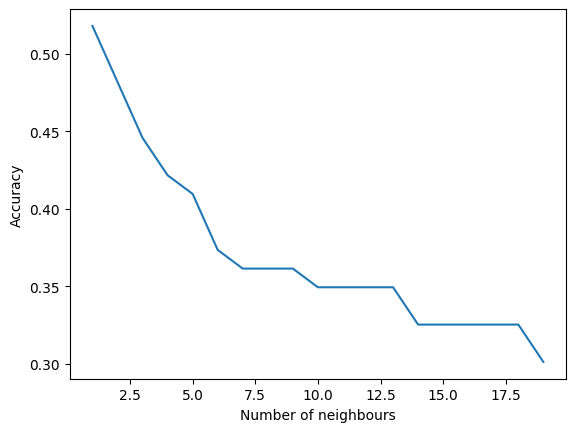

In [39]:
# Let's plot the accuracy vs number of neighbours
plt.plot(neighbours, accuracy)
plt.xlabel('Number of neighbours')
plt.ylabel('Accuracy')
plt.show()

In [40]:
# Let's train the KNeighboursClassifier with the optimal number of neighbours
knn = KNeighborsClassifier(n_neighbors=n_optimal)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
acc = accuracy_score(y_test, y_pred)
acc*100

63.46153846153846

In [41]:
# Let's train a RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

estimators = range(10,200)
accuracy = []

for n_estimators in estimators:
    rf = RandomForestClassifier(class_weight='balanced', n_estimators=n_estimators)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_val)
    accuracy.append(accuracy_score(y_val, y_pred))

# Let's find the optimal number of estimators
n_optimal = estimators[accuracy.index(max(accuracy))]
n_optimal

27

In [42]:
rf = RandomForestClassifier(class_weight='balanced', n_estimators=n_optimal)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
acc = accuracy_score(y_test, y_pred)
acc*100

56.730769230769226

In [44]:
# Let's train a SVC
from sklearn.svm import SVC

kernels = ['linear', 'poly', 'rbf', 'sigmoid']
accuracy = []

for kernel in kernels:
    svc = SVC(kernel=kernel, class_weight='balanced')
    svc.fit(X_train, y_train)
    y_pred = svc.predict(X_val)
    accuracy.append(accuracy_score(y_val, y_pred))

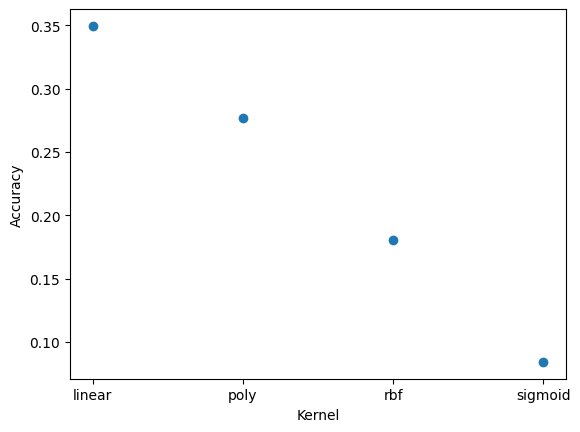

In [46]:
# Let's plot the accuracy vs kernel
plt.scatter(kernels, accuracy)
plt.xlabel('Kernel')
plt.ylabel('Accuracy')
plt.show()

In [47]:
# Let's train the SVC with the optimal kernel
optimal_kernel = kernels[accuracy.index(max(accuracy))]
svc = SVC(kernel=optimal_kernel, class_weight='balanced')
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
acc = accuracy_score(y_test, y_pred)
acc*100

43.269230769230774